In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import googlemaps
import os

import funciones
from shapely.geometry import Point

import matplotlib.pyplot as plt
%matplotlib inline

#para decodificar polilineas
#https://developers.google.com/maps/documentation/utilities/polylineutility
#'`__rEb|ucJl@cB|BgGbOa\\bHuQh@cB@CdBmFnCcH~BgM~A}GbBcIh@qBCJ'


In [2]:
#Creo la geometria
geo = gpd.read_file('../data/fracciones/FraccionesPoligonoCABA.shp') 
#cambio coordenadas a latlong para google
geo = geo.to_crs(epsg=4326)
geo['X'] = [geo.geometry.iloc[i].centroid.x for i in range(geo.shape[0])]
geo['Y'] = [geo.geometry.iloc[i].centroid.y for i in range(geo.shape[0])]


In [12]:
variablesMapeo = [ u'tramos',u'distancia',u'costo',u'tiempoTotal','descripcion',
              u'duracionIngreso', u'distanciaIngreso',
         u'duracionEgreso',  u'distanciaEgreso',  u'tiempoEnSistema']

In [3]:
#creo el vector de destinos
escenario1 = gpd.read_file('../data/escenarios/Escenario1.shp')
escenario1 = escenario1.to_crs(epsg=4326)
destinos = [(escenario1.geometry.iloc[i].y,escenario1.geometry.iloc[i].x) for i in range(escenario1.shape[0])]


In [4]:
dataE1D1 = funciones.generarDataset(geo.copy(),destinos[0])

In [10]:
def mapear(dataset,variable,destino,archivo,titulo):
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if variable == 'descripcion':
        dataset[variable] = dataset[variable].map(str)
        dataset.plot(column=variable,
             alpha=1,
             linewidth=0.2,
             ax=ax,
             cmap = 'Set2',
                     legend = True)
    else:
        dataset.plot(column=variable,
                 alpha=1,
                 linewidth=0.2,
                 ax=ax,
                 cmap = 'RdYlGn',
                 scheme='QUANTILES',
                      legend = True)
    ax.plot([destino[1]],[destino[0]],'bo')
    plt.title(titulo)
    plt.savefig(archivo)

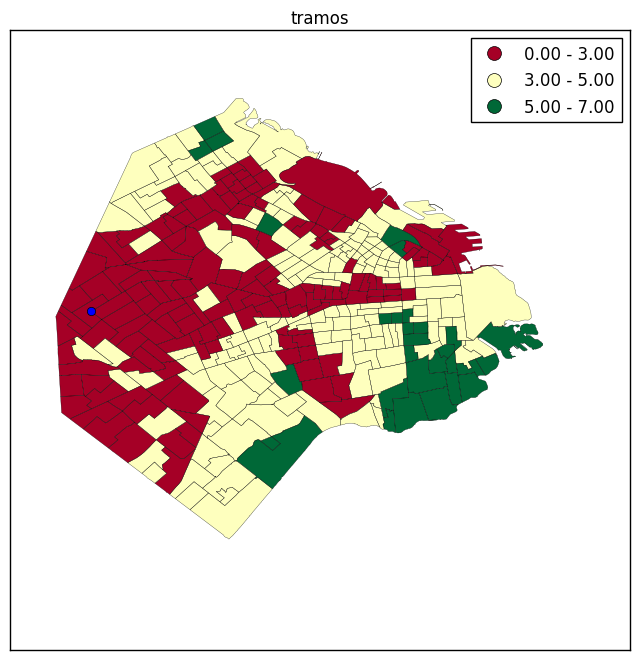

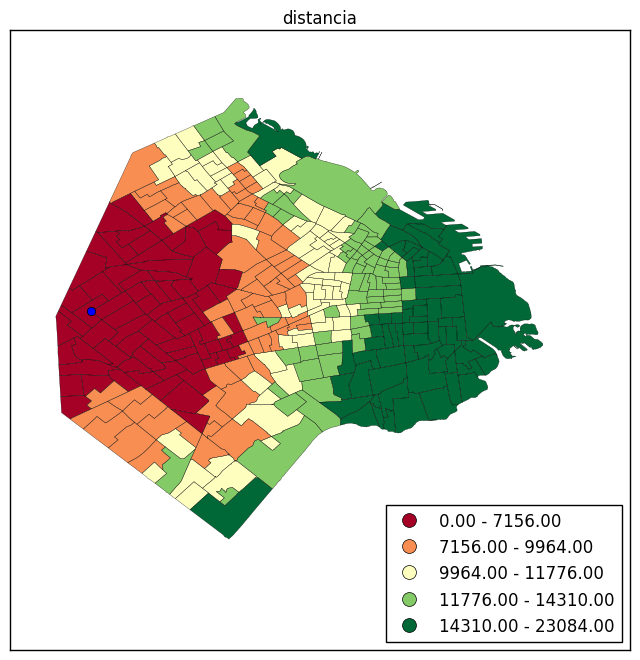

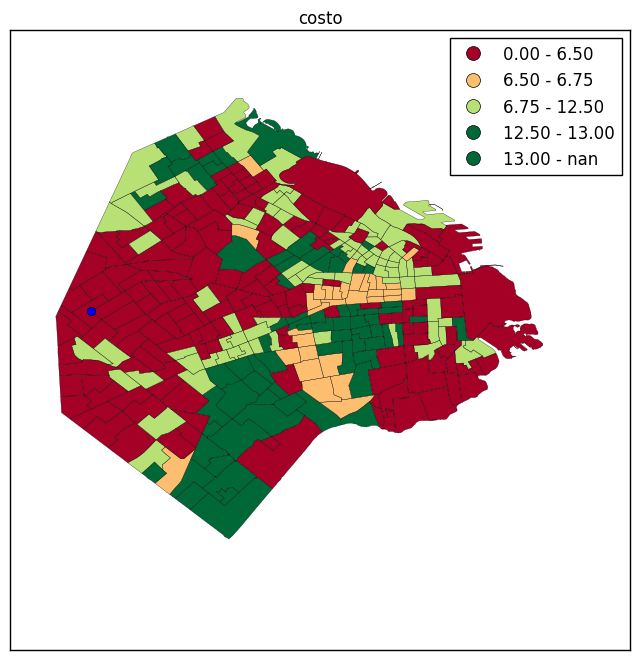

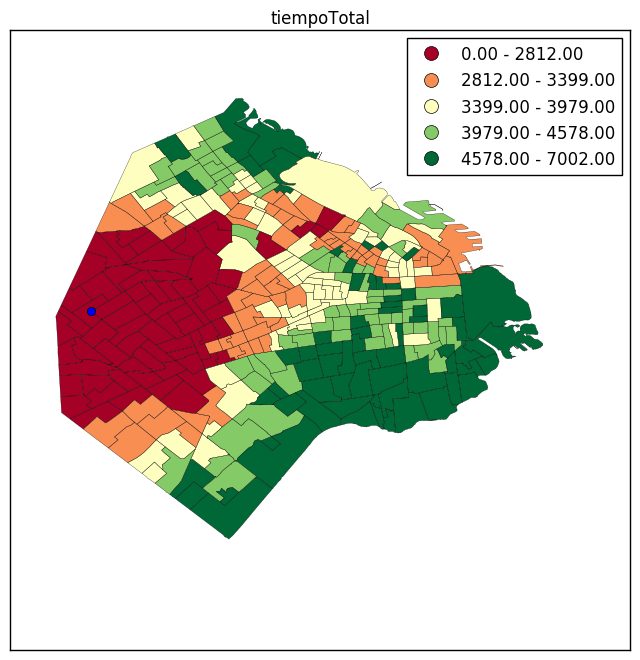

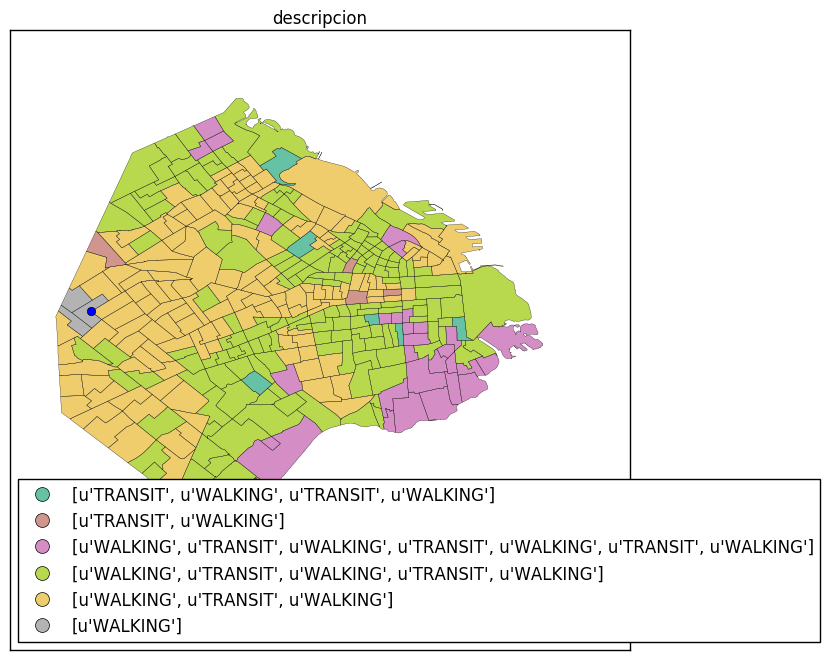

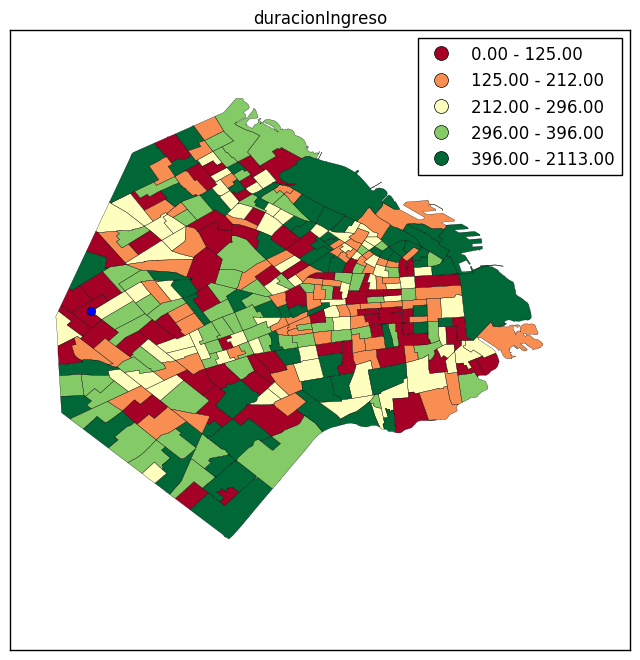

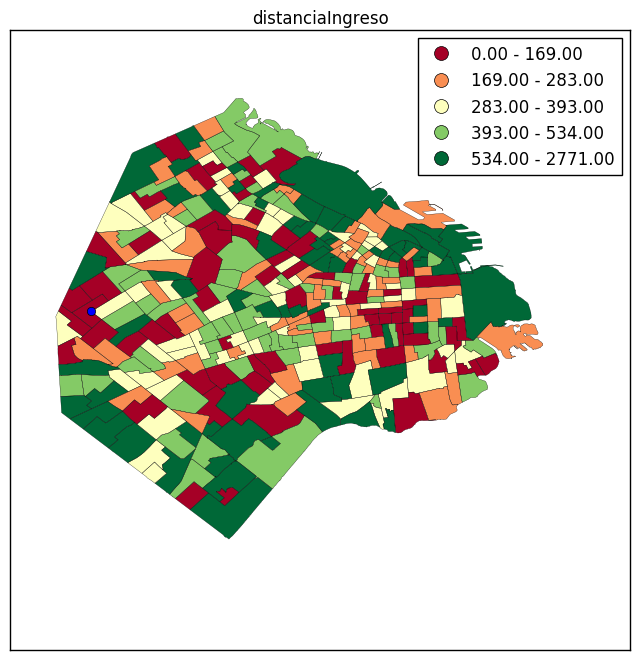

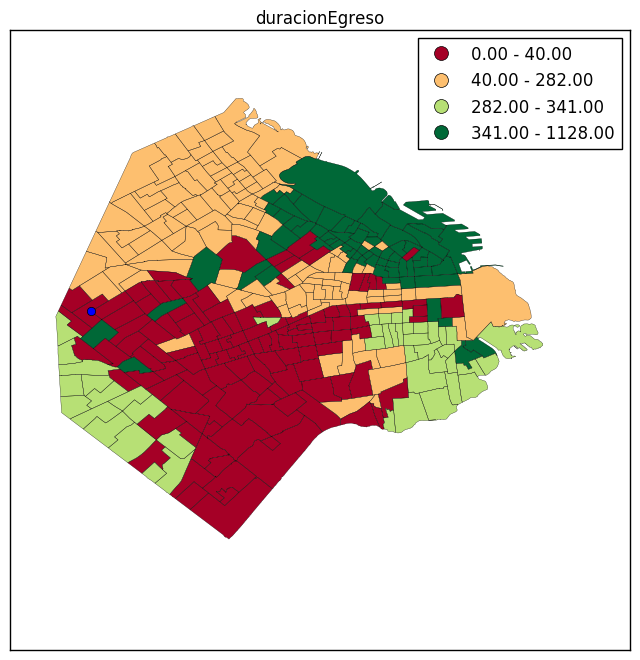

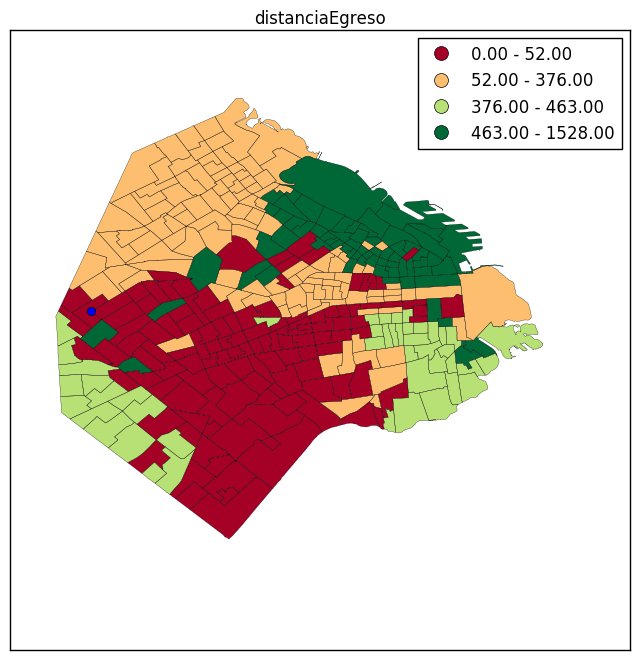

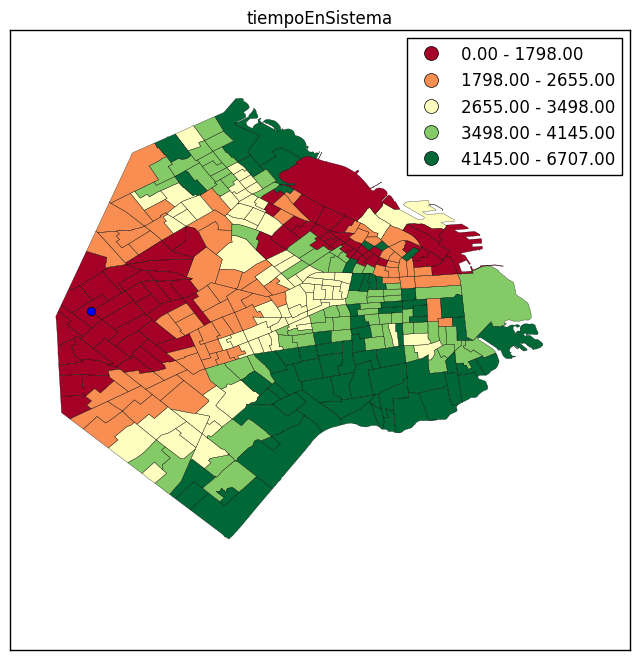

In [13]:
for var in variablesMapeo:
    mapear(dataset = dataE1D1,
           variable = var,
           destino = destinos[0],
           archivo = '../maps/dataE1D1' +'-' + var +'.png',
           titulo = var)

In [ ]:
#setear tiempo de corrida
#transit_routing_preference = 'fewer_transfers'
#cambiar a posgar
#plotear



In [ ]:
dataE1D2 = generarDataset(data.copy(),destinos[1])
dataE1D3 = generarDataset(data.copy(),destinos[2])
dataE1D4 = generarDataset(data.copy(),destinos[3])
dataE1D5 = generarDataset(data.copy(),destinos[4])
dataE1D6 = generarDataset(data.copy(),destinos[5])
dataE1D7 = generarDataset(data.copy(),destinos[6])


In [ ]:
dataE1D1.to_csv('dataE1D1.csv',index=False)
dataE1D2.to_csv('dataE1D2.csv',index=False)
dataE1D3.to_csv('dataE1D3.csv',index=False)
dataE1D4.to_csv('dataE1D4.csv',index=False)
dataE1D5.to_csv('dataE1D5.csv',index=False)
dataE1D6.to_csv('dataE1D6.csv',index=False)

In [ ]:
#import ast
#ast.literal_eval